Sentiment Analysis

In [1]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import nltk
from nltk.corpus import stopwords # Import the stop word list
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

Word detection function

In [2]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

Function to deal with Punctuation, Numbers and Stopwords: NLTK and regular expressions

In [3]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 3. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 5. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

Read tweeter data

In [4]:
tweets_data_path = 'data.txt'
with open(tweets_data_path) as file:
    tweets_data = json.load(file)

Print number of tweets

In [5]:
print len(tweets_data)

115


Structure the tweets data into a pandas DataFrame to simplify the data manipulation.

In [6]:
tweets = pd.DataFrame()

Add e columns to the tweets DataFrame called text, where text column contains the tweet,

In [8]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets['sentiment'] = map(lambda tweet: tweet['sentiment'], tweets_data)

Read first tweet.

In [10]:
print tweets['text'][0]

Dapat sampul duit raya dari member kerja CIMB Bank https://t.co/o96536Uf0U


Remove punctuation and numbers

In [11]:
print stopwords.words("english") 

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

Create CSV file

In [12]:
# Open/create a file to append data to
csvFile = open('tweet.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweets['text']:
    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.encode('utf-8')])
    #print tweet.encode('utf-8')
    #print "\n"
csvFile.close()

Show top 5 languages in which the tweets were written.

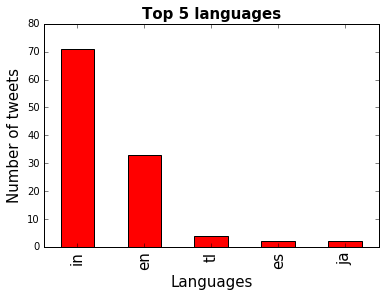

In [13]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

Show top 5 countries from which the tweets were sent.

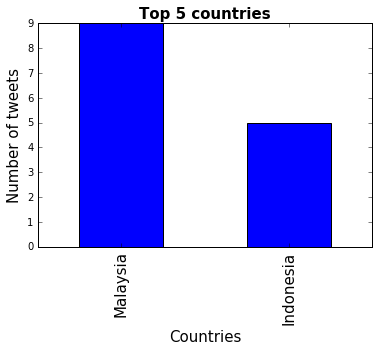

In [14]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

Add 3 columns to our tweets DataFrame.

In [15]:
tweets['maybank'] = tweets['text'].apply(lambda tweet: word_in_text('maybank', tweet))
tweets['cimb'] = tweets['text'].apply(lambda tweet: word_in_text('cimb', tweet))
tweets['hong leong'] = tweets['text'].apply(lambda tweet: word_in_text('hong leong', tweet))

Calculate the number of tweets for each programming language as follows:

In [16]:
print tweets['maybank'].value_counts()[True]
print tweets['cimb'].value_counts()[True]
print tweets['hong leong'].value_counts()[True]

49
63
6


Make a simple comparaison chart by executing the following:

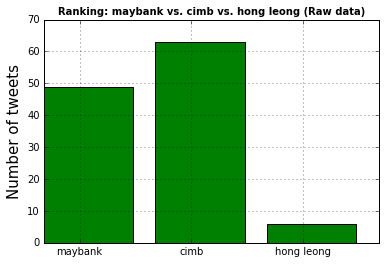

In [17]:
prg_langs = ['maybank', 'cimb', 'hong leong']
tweets_by_prg_lang = [tweets['maybank'].value_counts()[True], tweets['cimb'].value_counts()[True], tweets['hong leong'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: maybank vs. cimb vs. hong leong (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [18]:
clean_review = review_to_words( tweets["text"][0] )

print "Comparision..."
print tweets["text"][0]
print clean_review

Comparision...
Dapat sampul duit raya dari member kerja CIMB Bank https://t.co/o96536Uf0U
dapat sampul duit raya dari member kerja cimb bank https co uf u


Loop through and clean all of the training set at once

In [19]:
# Get the number of reviews based on the dataframe column size
num_reviews = tweets["text"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( tweets["text"][i] ) )

Using the feature_extraction module from scikit-learn to create bag-of-words features.

In [20]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Show see what the training data array now looks like

In [21]:
print train_data_features.shape

(115, 769)


Take a look at the words in the vocabulary

In [22]:
vocab = vectorizer.get_feature_names()
print vocab

[u'aah', u'aan', u'acc', u'account', u'accounts', u'action', u'ada', u'ade', u'adik', u'admin', u'administrasi', u'afternoon', u'ahaha', u'ahh', u'ainsmiley', u'aja', u'ajar', u'aje', u'akan', u'akaun', u'aku', u'alhamdulillah', u'allah', u'allows', u'alphanumeric', u'aman', u'amp', u'analyst', u'anda', u'andytelasai', u'aneh', u'ansuran', u'anty', u'apa', u'apple', u'approve', u'apps', u'apqewm', u'aq', u'aqilahzull', u'arah', u'aritu', u'arpvql', u'asia', u'assists', u'astro', u'atas', u'atieliaaa', u'atm', u'auth', u'auto', u'babe', u'back', u'baik', u'bala', u'balance', u'balik', u'bangi', u'bank', u'banks', u'bantuan', u'banyak', u'baru', u'basraf', u'bayar', u'bayarnya', u'bb', u'bbbjoiioiauaja', u'bchb', u'beban', u'bebas', u'bebetul', u'beli', u'beralih', u'berapa', u'berbelanja', u'berbuka', u'berdiri', u'berhad', u'berjalan', u'berlari', u'bestnya', u'better', u'beverage', u'bg', u'biaya', u'bila', u'bill', u'bintaro', u'bisa', u'biykdwm', u'biznewsfix', u'bjeegn', u'blank', 

Print the counts of each word in the vocabulary

In [23]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print count, tag

1 aah
1 aan
3 acc
4 account
1 accounts
1 action
6 ada
3 ade
1 adik
2 admin
1 administrasi
1 afternoon
1 ahaha
1 ahh
1 ainsmiley
1 aja
1 ajar
1 aje
1 akan
2 akaun
9 aku
1 alhamdulillah
1 allah
1 allows
1 alphanumeric
2 aman
2 amp
1 analyst
1 anda
2 andytelasai
1 aneh
1 ansuran
1 anty
2 apa
1 apple
1 approve
3 apps
1 apqewm
1 aq
1 aqilahzull
1 arah
1 aritu
1 arpvql
1 asia
1 assists
1 astro
3 atas
2 atieliaaa
3 atm
1 auth
1 auto
1 babe
1 back
1 baik
2 bala
2 balance
1 balik
2 bangi
9 bank
1 banks
1 bantuan
1 banyak
5 baru
1 basraf
2 bayar
1 bayarnya
2 bb
1 bbbjoiioiauaja
1 bchb
1 beban
1 bebas
1 bebetul
3 beli
1 beralih
2 berapa
1 berbelanja
1 berbuka
1 berdiri
3 berhad
1 berjalan
1 berlari
1 bestnya
2 better
1 beverage
1 bg
3 biaya
1 bila
1 bill
1 bintaro
2 bisa
1 biykdwm
2 biznewsfix
1 bjeegn
1 blank
2 blh
1 blom
1 bnga
1 bo
3 boleh
1 boss
1 bravo
3 buat
1 buckled
1 buffet
2 buka
2 bukak
1 bukanmasochism
1 bukber
2 bulanan
1 bumiputra
1 burst
1 business
1 bussiness
1 buy
2 bv
1 bye
2 ca

Use the Random Forest classifier

In [24]:
print "Training the random forest..."
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, tweets["sentiment"] )

Training the random forest...


Prediction

In [25]:
# Read the test data
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print test.shape

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["text"])
clean_test_reviews = [] 

print "Cleaning and parsing the test set...\n"
for i in xrange(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print "Text %d of %d\n" % (i+1, num_reviews)
    clean_review = review_to_words( test["text"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

IOError: File testData.tsv does not exist